#### simple Liner regression

- MSE 
    - Advantages
        - its differentiable
        - it have one local and global minima
    -  Dis Advantages
        - not robust to outliers
        - its not in the same unit

- MAE 
    - Advantages
        - robust to outliers
        - it will be in the same unit
    -  Dis Advantages
        - convergense it will take time
        - optimization it will take time
- RMSE 
    - Advantages
        - its differentiables
        - it will be in the same unit
    -  Dis Advantages
        - not robust to outliers

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
## read data
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'wight vs height')

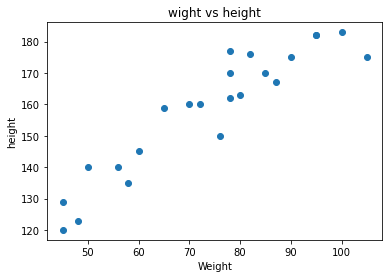

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('height')
plt.title('wight vs height')

In [21]:
## divide our datset into independent and dependent
X=df[['Weight']] ## input feature
y=df['Height']  ## output feature

In [22]:
## train test split
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [24]:
X_train.shape,y_train.shape

((18, 1), (18,))

In [25]:
X_test.shape, y_test.shape

((5, 1), (5,))

In [26]:
## standardtise the indepndent data
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

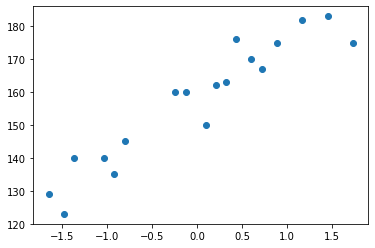

In [33]:
plt.scatter(X_train,y_train)

In [34]:
## train our model
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
print("The slope of the weight is ",model.coef_)
print("The intercept of the weight is ",model.intercept_)

The slope of the weight is  [17.03440872]
The intercept of the weight is  157.5


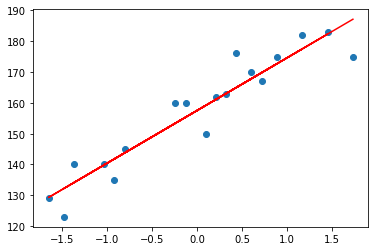

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),'r')

In [46]:
y_pred_test=model.predict(X_test)

In [48]:
y_pred_test,y_test

(array([163.44962265, 163.44962265, 129.59832137, 180.88817179,
        150.11426154]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

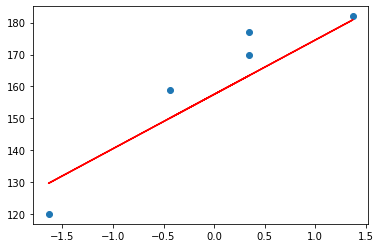

In [49]:
plt.scatter(X_test,y_test)
plt.plot(X_test,model.predict(X_test),'r')

#### performance Metrics
- MSE, MAE, RMSE
- Rsquare , Adjust R square

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print( "mse",mse)
print( "mae",mae)
print("rmse",rmse)

mse 79.76809057832979
mae 7.9393285483063725
rmse 8.931298370244372


In [55]:
from sklearn.metrics import r2_score

In [57]:
score=r2_score(y_test,y_pred_test)
score

0.8379487839705635

In [67]:
## New data point weight 80
scaleweight=scaler.transform([[80]])


array([[0.]])

In [68]:
scaler.fit_transform([[90]])

array([[0.]])

In [72]:
scaler.transform([[80]])

array([[-10.]])

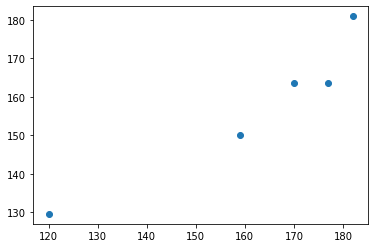

In [75]:
### Assumption required for liner regression
## plot the scatter plot
plt.scatter(y_test,y_pred_test)
## the output is liner 

In [77]:
## Residual
residual=y_test-y_pred_test
residual

15    13.550377
9      6.550377
0     -9.598321
8      1.111828
17     8.885738
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

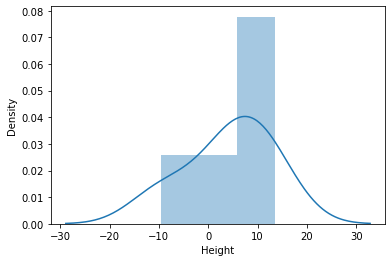

In [80]:
## plot the residual
sns.distplot(residual,kde=True)

## This distirbution is normal

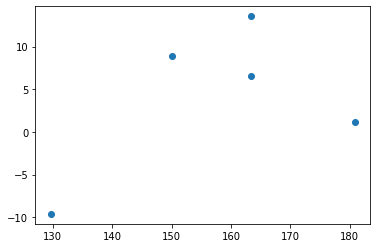

In [82]:
### plot predict vs residual
## uniform distribution
plt.scatter(y_pred_test,residual)